# APPS Data Science Interview

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Exploratory Data Analysis

### Reading the data

In [285]:
events = pd.read_csv("data/interview_events.csv", parse_dates=["client_ts"])
revenue = pd.read_csv("data/interview_revenue.csv", parse_dates=["revenue_day"])

In [286]:
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android


In [287]:
revenue.head()

,user_id,revenue_day,revenue
0,7799779337307357843,2019-12-01,0.015406
1,2903532465681507879,2019-12-01,0.019093
2,7271844357181366660,2019-12-01,0.011785
3,-6989185766557698704,2019-12-01,0.013538
4,-1388044436100964633,2019-12-01,0.002288


### Check size of data cuz why not?

In [288]:
print(len(revenue))
print(len(events))

11301
1748861


### First things first need to seperate date values

In [289]:
events["year"] = events.client_ts.dt.year
events["month"] = events.client_ts.dt.month
events["day"] = events.client_ts.dt.day
events["hour"] = events.client_ts.dt.hour
events["minute"] = events.client_ts.dt.minute
events["seconds"] = events.client_ts.dt.second

revenue["year"] = revenue.revenue_day.dt.year
revenue["month"] = revenue.revenue_day.dt.month
revenue["day"] = revenue.revenue_day.dt.day

In [290]:
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6


In [291]:
revenue.head()

,user_id,revenue_day,revenue,year,month,day
0,7799779337307357843,2019-12-01,0.015406,2019,12,1
1,2903532465681507879,2019-12-01,0.019093,2019,12,1
2,7271844357181366660,2019-12-01,0.011785,2019,12,1
3,-6989185766557698704,2019-12-01,0.013538,2019,12,1
4,-1388044436100964633,2019-12-01,0.002288,2019,12,1


### Let's check if we need month and year values my guess is we don't (normally you don't do this)

In [292]:
print(events.year.unique())
print(events.month.unique())
print(revenue.year.unique())
print(revenue.month.unique())

[2019 2015]
[12 11  1]
[2019 2020]
[12  1]


### To my surprise there are actually more than one year and one month of data in this set
### So I'm gonna check if data from 2015 is sizeable enough to consider

In [293]:
events.reset_index().groupby("year").nunique()

,index,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds
year,,,,,,,,,,,,,,
2015,132,1,121,36,11,1,1,1,1,1,1,1,18,54
2019,1748729,1768,792898,2085,148599,5,12,1,1,2,23,24,60,60


### Data from 2015 has too small of a sample size so I'm just gonna drop it

In [166]:
print(len(events))
events = events[events.year != 2015]
len(events)

1748861


1748729

### Let's split event_id since it contains several information in one column

In [306]:
events["event_name"], events["level"] = events["event_id"].str.split(':', 1).str
events["description"], events["level"] = events["level"].str.split(':', 1).str
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds,event_name,level,description
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45,Start,L0,turkish
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55,Complete,L0,turkish
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56,app,NaN,gameScore
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4,Start,L1,turkish
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6,wrong,L1,turkish


In [313]:
events.level.fillna("L-1", inplace=True)

### Now to One Hot Encode categories
### Also it's time to drop unwanted columns

In [ ]:
events.drop(columns=[""])

### Quick graph to show I can use matplotlib/seaborn but it shows no interesting information cuz I got no imagination

In [167]:
graph_data = events.reset_index().groupby("version").nunique()

In [168]:
graph_data = pd.DataFrame(graph_data.user_id)
graph_data.reset_index(inplace=True)

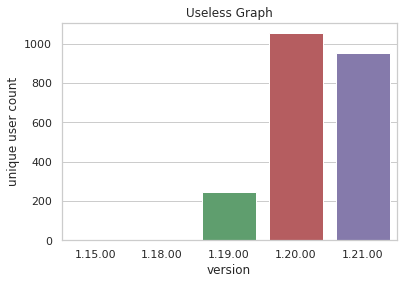

In [169]:
sns.set(style="whitegrid")
ax = sns.barplot(x="version", y="user_id", data=graph_data)

ax.set(xlabel="version", ylabel="unique user count", title="Useless Graph")

plt.show()

### To be fair it shows version 1.21 didn't gain many new users when it launched

### Need to get sign up dates of users for retention

In [170]:
events["event_date"] = events.client_ts.dt.strftime("%Y-%m-%d")
signup_dates = pd.DataFrame(events.groupby("user_id").event_date.min())

In [171]:
signup_dates.reset_index(inplace=True)
signup_dates.columns = ["user_id", "signup_date"]
signup_dates.head()

,user_id,signup_date
0,-9215534650345115924,2019-12-01
1,-9215240100939776087,2019-12-03
2,-9202484284851622629,2019-12-01
3,-9197151025395411316,2019-12-03
4,-9167946499694210868,2019-12-07


In [172]:
events = events.join(signup_dates.set_index("user_id"), on="user_id")
events.head()

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds,event_date,signup_date
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45,2019-12-01,2019-12-01
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55,2019-12-01,2019-12-01
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56,2019-12-01,2019-12-01
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4,2019-12-01,2019-12-01
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6,2019-12-01,2019-12-01


### Now to calculate seniority

In [177]:
events.event_date = pd.to_datetime(events.event_date)
events.signup_date = pd.to_datetime(events.signup_date)
events["seniority"] = (events.event_date - events.signup_date).dt.days + 1

events.head(10)

,user_id,client_ts,event_id,value,version,country_code,os_type,year,month,day,hour,minute,seconds,event_date,signup_date,seniority
0,-9215534650345115924,2019-12-01 17:36:45+00:00,Start:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,45,2019-12-01,2019-12-01,1
1,-9215534650345115924,2019-12-01 17:36:55+00:00,Complete:turkish:L0,NaN,1.20.00,TR,android,2019,12,1,17,36,55,2019-12-01,2019-12-01,1
2,-9215534650345115924,2019-12-01 17:36:56+00:00,app:gameScore,100.0,1.20.00,TR,android,2019,12,1,17,36,56,2019-12-01,2019-12-01,1
3,-9215534650345115924,2019-12-01 17:37:04+00:00,Start:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,4,2019-12-01,2019-12-01,1
4,-9215534650345115924,2019-12-01 17:37:06+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,6,2019-12-01,2019-12-01,1
5,-9215534650345115924,2019-12-01 17:37:07+00:00,wrong:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,7,2019-12-01,2019-12-01,1
6,-9215534650345115924,2019-12-01 17:37:11+00:00,app:gameScore,194.0,1.20.00,TR,android,2019,12,1,17,37,11,2019-12-01,2019-12-01,1
7,-9215534650345115924,2019-12-01 17:37:11+00:00,Complete:turkish:L1,NaN,1.20.00,TR,android,2019,12,1,17,37,11,2019-12-01,2019-12-01,1
8,-9215534650345115924,2019-12-01 17:37:20+00:00,Start:turkish:L2,NaN,1.20.00,TR,android,2019,12,1,17,37,20,2019-12-01,2019-12-01,1
9,-9215534650345115924,2019-12-01 17:37:27+00:00,Complete:turkish:L2,NaN,1.20.00,TR,android,2019,12,1,17,37,27,2019-12-01,2019-12-01,1


# 2. Retention Calculation

In [186]:
group = events.groupby(["signup_date", "seniority"])
cohort_data = group["user_id"].size()
cohort_data = cohort_data.reset_index()
cohort_data

,signup_date,seniority,user_id
0,2019-11-19,1,822
1,2019-11-20,1,1
2,2019-11-20,2,38
3,2019-11-20,4,9
4,2019-11-20,20,13
...,...,...,...
155,2019-12-13,2,18687
156,2019-12-13,3,7972
157,2019-12-14,1,35417
158,2019-12-14,2,16007


In [180]:
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='user_id')
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)

In [187]:
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20
signup_date,,,,,,,,,,,,,,,,,
2019-11-19,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-20,1.0,38.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
2019-11-27,22.0,518.0,319.0,384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-29,1.0,545.0,911.0,1032.0,405.0,526.0,NaN,36.0,561.0,488.0,319.0,734.0,1113.0,180.0,650.0,733.0,NaN
2019-11-30,3469.0,5290.0,3470.0,1658.0,1934.0,1564.0,1372.0,1939.0,1194.0,641.0,298.0,786.0,1205.0,871.0,925.0,739.0,NaN
2019-12-01,86608.0,54627.0,44552.0,43257.0,34592.0,29992.0,28109.0,24829.0,20199.0,20314.0,19930.0,14118.0,10524.0,10678.0,7438.0,NaN,NaN
2019-12-02,45591.0,32801.0,25821.0,17098.0,14402.0,13234.0,12697.0,14336.0,7986.0,6187.0,5530.0,4491.0,4651.0,4515.0,NaN,NaN,NaN
2019-12-03,36037.0,28294.0,17021.0,14490.0,17920.0,8734.0,12910.0,9479.0,8275.0,5672.0,5278.0,6206.0,3443.0,NaN,NaN,NaN,NaN
2019-12-04,28476.0,21567.0,12469.0,11232.0,13338.0,9406.0,7635.0,6440.0,4824.0,4237.0,3309.0,3483.0,NaN,NaN,NaN,NaN,NaN


In [212]:
retention = cohort_counts.divide(base, axis=0).round(3)

# Quick trick to show a much nicer heatmap
retention_first_week = retention.loc[:, :8]
retention_first_week = retention_first_week[4:]

In [214]:
retention_first_week

seniority,1,2,3,4,5,6,7,8
signup_date,,,,,,,,
2019-11-30,1.0,1.525,1.000,0.478,0.558,0.451,0.396,0.559
2019-12-01,1.0,0.631,0.514,0.499,0.399,0.346,0.325,0.287
2019-12-02,1.0,0.719,0.566,0.375,0.316,0.290,0.278,0.314
2019-12-03,1.0,0.785,0.472,0.402,0.497,0.242,0.358,0.263
2019-12-04,1.0,0.757,0.438,0.394,0.468,0.330,0.268,0.226
2019-12-05,1.0,0.408,0.298,0.170,0.129,0.126,0.132,0.053
2019-12-06,1.0,0.853,0.547,0.356,0.329,0.300,0.237,0.165
2019-12-07,1.0,1.009,0.552,0.576,0.274,0.256,0.204,0.505
2019-12-08,1.0,0.598,0.401,0.270,0.225,0.145,0.118,0.060


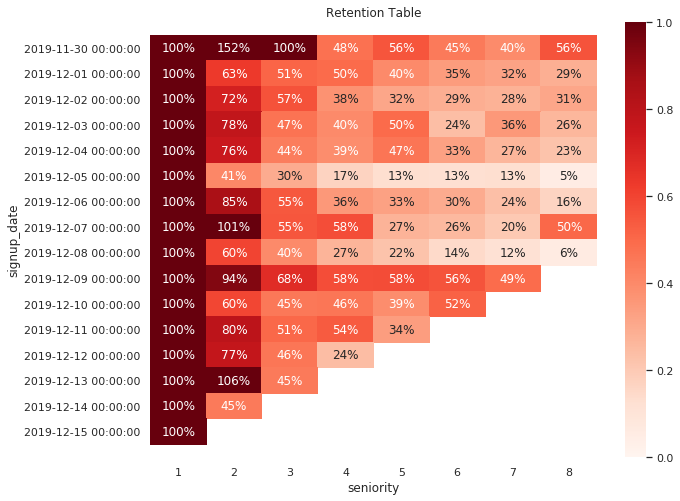

In [229]:
plt.figure(figsize=(10,8))
plt.title('Retention Table')
ax = sns.heatmap(data=retention_first_week, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_first_week.index)

# Turns out there is a bug in matplotlib
ax.set_ylim(len(retention_first_week)+0.5, -0.5)

fig=ax.get_figure()

plt.show()

# 3. RFM Analysis

In [233]:

for ide in events.user_id.unique():
    user_df = events[events.user_id = ide]
    active_day_count = len(user_df.event_date.unique())
    completed_levels_count = len([x for x in user_df.event_id if "complete" in x.lower()])
    failed_times_count = len([x for x in user_df.event_id if "wrong" in x.lower()])

array([-9215534650345115924, -9215240100939776087, -9202484284851622629,
       ...,  9215640541058628139,  9215693985055962487,
        9221849159789412152])

In [247]:
y

3